# Let's Try Asemic Writing With DrawBot

Assignment for [Allison Parrish](https://www.decontextualize.com/)'s class, ITP Spring 2020

by [Lynne Yun](https://www.lynneyun.com/)

In [4]:
import drawBot as draw

import os

from bezmerizing import Polyline

import numpy as np

from numpy.random import uniform, normal, choice

from IPython.display import Image, display
                
def show(png):
    drawing = Image(filename = "drawBotImage.png")
    display(drawing)
    
from scipy.stats import truncnorm
def t_normal(a, b, mu, sigma):
    tn = truncnorm((a-mu)/sigma, (b-mu)/sigma, loc=mu, scale=sigma)
    return tn.rvs(1)[0]

In [5]:
def shape_properties(fill_color,stroke_color):
    draw.fill(*fill_color)
    draw.stroke(*stroke_color)

## Polylines on a grid

Let's pursue this aesthetic a little bit further. Introducing further constraints to the randomness will result in designs that give the impression of conforming to an underlying system (and, let's hypothesize, thereby give an impression of being more like "writing"). The code below also uses random polylines, but constrains the polylines to begin and end on certain points in the grid.

Let's try to draw a line on a 7 x 7 grid.

In [6]:
def shape_properties(fill_color, stroke_color,stroke_width):
    return lambda: (
        draw.fill(*fill_color),
        draw.stroke(*stroke_color),
        draw.strokeWidth(stroke_width))

red = (1,0,0,1)
green = (0,1,0,1)
blue = (0,0,1,1)
black = (0,0,0,1)
transparent_black = (0,0,0,0.1)
no_color = (0,0,0,0)
stroke_width = 1

set_red = shape_properties(no_color,red,stroke_width)
set_green = shape_properties(no_color,green,stroke_width)
set_blue = shape_properties(no_color,blue,stroke_width)
set_black = shape_properties(no_color,black,2)
set_trsblk = shape_properties(no_color,transparent_black,stroke_width)


In [7]:
from scipy.stats import truncnorm
def t_normal(a, b, mu, sigma):
    tn = truncnorm((a-mu)/sigma, (b-mu)/sigma, loc=mu, scale=sigma)
    return tn.rvs(1)[0]

In [8]:
#The first parameter is the low end of the range, the second parameter is the high end, the third parameter is the center and the fourth parameter is the standard deviation.
t_normal(0, 7, 3, 1)


3.0371090932168023

In [144]:
##let's write a function for the curves!


def cord_append(x,y,pts):
    if y <= 0:
        y = 0
    if y >= 6:
        y = 6
    if x >= 6:
        x = 6
    if x <= 0:
        x = 0
    pts.append([x, y]) 

# def offset(width,pts): ##offsetting pt list
#     offset_pts = []
#     for x in pts:
#         temp_list= []
#         for y in range(len(x)):
#             temp = [y + width for y in x] 
#         offset_pts.append(temp)
        
#     for x in reversed(offset_pts):
#         pts.append(x)
        
#     pts.append(pts[0])

##First curve (upper left to lower right)

def make_primary_line(gridsize):
    pts = []
    for i in range(0,6):
        if i ==0:
            x = t_normal(0, 1, 0.5, 1)
            y = t_normal(5, 6, 5.5, 1)
            cord_append(x,y,pts)
        elif x <= 2:
            x += t_normal(0, 1, 0.5, 1)
            y -= t_normal(1, 3, 2, 1)
            cord_append(x,y,pts)
        elif x > 2:
            x += t_normal(1, 3, 2, 1)
            y -= t_normal(0, 1, 0.5, 1)
            cord_append(x,y,pts)

        else:
            break
            

    width=0.6
    
    offset_pts = []
    for x in pts:
        temp_list= []
        for y in range(len(x)):
            temp = [y + width for y in x] 
        offset_pts.append(temp)

    offset_pts_rev=[]
    for x in reversed(offset_pts):
        offset_pts_rev.append(x)
    
    pline = Polyline(pts)
    pline2 = Polyline(offset_pts_rev)
    lines = pline.scale(gridsize)
    lines2 = pline2.scale(gridsize)
    path = draw.BezierPath()
    path.moveTo(lines.vertices[0])
    path.qCurveTo(*lines.vertices)
    path.lineTo(lines2.vertices[0])
    path.qCurveTo(*lines2.vertices)
    path.lineTo(lines.vertices[0])
    
    ##modify stop
    

    return path


def make_second_line(gridsize):
    pts = []
    for i in range(0,3):
        if i ==0:
            x = t_normal(1, 3, 2, 1)
            y = t_normal(4, 6, 5, 1)
            cord_append(x,y,pts)
        elif i > 0:
            x += t_normal(0, 3, 2, 1)
            y += t_normal(-3, 1, 0, 1)
            cord_append(x,y,pts)   
        elif i > 2:
            x += t_normal(1, 3, 2, 1)
            y -= t_normal(1, 3, 2, 1)
            cord_append(x,y,pts)

        else:
            break
    
    width=0.4
    
    offset_pts = []
    for x in pts:
        temp_list= []
        for y in range(len(x)):
            temp = [y + width for y in x] 
        offset_pts.append(temp)

    offset_pts_rev=[]
    for x in reversed(offset_pts):
        offset_pts_rev.append(x)
    
    pline = Polyline(pts)
    pline2 = Polyline(offset_pts_rev)
    lines = pline.scale(gridsize)
    lines2 = pline2.scale(gridsize)
    path = draw.BezierPath()
    path.moveTo(lines.vertices[0])
    path.qCurveTo(*lines.vertices)
    path.lineTo(lines2.vertices[0])
    path.qCurveTo(*lines2.vertices)
    path.lineTo(lines.vertices[0])
    
    return path

    

In [145]:
## guide grid by 7x7 

def draw_grid(gridsize):
    for x in range(7):
        for y in range(7):
            draw.oval(x*gridsize-1,y*gridsize-1,2,2)
            

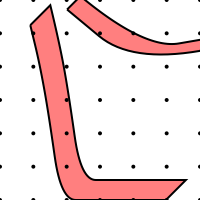

In [157]:
canvas = 200
gridsize = float(canvas/6) ## number of row/columns
draw.newDrawing()
draw.newPage(canvas,canvas)

set_black()
draw.fill(1, 0, 0, .5)
draw.drawPath(make_primary_line(gridsize))
draw.drawPath(make_second_line(gridsize))


draw_grid(gridsize)

draw.saveImage("drawBotImage.png")
draw.endDrawing()
show(Image)


The key bit of code here is:

The following cell draws these "characters" on a grid, so we can see many variations at once:

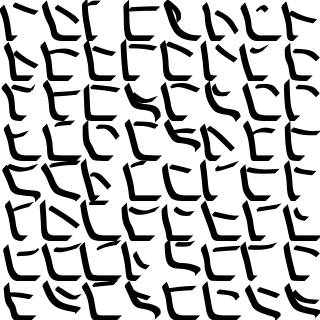

In [160]:
canvas = 320
draw.newDrawing()
draw.newPage(canvas,canvas)
set_black()
draw.fill(0, 0, 0, 1)

grid_n = 8 # change the number of elements in the grid on one side
grid_size = canvas / grid_n
for i in range(grid_n):
    for j in range(grid_n):
        with draw.savedState():
            draw.translate(i*grid_size, j*grid_size)
            draw.drawPath(make_primary_line(grid_size * 0.15))
            draw.drawPath(make_second_line(grid_size * 0.15))


draw.saveImage("drawBotImage.png")
draw.endDrawing()
show(Image)